Decision Tree

심장병은 국내 사망원인 2위에 해당되며 급성 심장질환같은 경우에는 즉시 치료를 한다 하여도 

치사율이 30~40%에 달할 정도로 위험한 질병이다.

따라서 실제 어느 요소들이 심장병과 관련이 있는지 분석하고 추후 심장병이 발생할 수 있는 사람들을 예측하는 모델을 만들고자 'Heart Disease' data set을 이용하여 Decision Tree를 진행하고

 그 결과를 해석하고자 한다.

 데이터셋은 다음 사이트에서 가져왔다.

 https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction



채점 기준 (상, 중상, 중, 중하, 하)

1. 연구 목적 설정 및 데이터 설명 (classification, regression task 모두에 대해 실습 과제 수행)

2. Classification/Regression DT에서 사용한 주요 지표(entropy, gini, mse 등)에 대한 설명

3. 각각의 DT에 대해 하이퍼파라미터 튜닝을 올바르게 진행

4. 각각의 task에 대한 결과 및 성능 비교 (연구 목적에 따라 어떠한 성능 지표를 우선적으로 평가할지)

5. 각각의 tree에 대한 시각화 및 규칙 해석 진행

6. Feature importance 확인 및 결과 해석



* ID3, CART, CHAID, C4.5 등 추가적인 decision tree 알고리즘에 대한 차이 설명 및 실습을 진행하는 경우 채점 plus가 될 수 있습니다.

# Classification

##Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/HW7/heart.csv')   #데이터셋 불러오기

Attribute Information

Age (나이): age of the patient [years]

Sex (성별): sex of the patient [M: Male, F: Female]

ChestPainType (가슴 고통 종류): chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP (휴식상태의 혈압): resting blood pressure [mm Hg]

Cholesterol (콜레스테롤): serum cholesterol [mm/dl]

FastingBS (혈당): fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG (휴식상태의 심전도): resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR (최대심장박동): maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina (협심증 유무): exercise-induced angina [Y: Yes, N: No]

Oldpeak (비교적 안정되기까지 운동으로 유발되는 ST depression): oldpeak = ST [Numeric value measured in depression]

ST_Slope (최대 운동 ST segment의 기울기): the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease (심장병 유무): output class [1: heart disease, 0: Normal]

In [ ]:
df.shape

(918, 12)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


FastingBS 데이터의 경우 실제로는 Binary한 Categorical 변수이기 때문에 Categorical 변수로 바꿔준다

In [ ]:
df.loc[df['FastingBS'] == 1, 'FastingBS'] = 'High'
df.loc[df['FastingBS'] == 0, 'FastingBS'] = 'Low'

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Low,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Low,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,Low,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Low,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Low,Normal,122,N,0.0,Up,0


데이터는 반복적으로 측정한 것이 아닌 개별 환자들의 진료 기록이기 때문에 

첫번째 Assumption인 관측치들간 독립성을 만족한다.   

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

결측치는 없기 때문에 Imputation을 진행하지 않는다.

## EDA

https://www.kaggle.com/code/kgxiao/eda-logistic-regression-recall-rate-91

https://www.kaggle.com/code/mohamedabidi97/exploratory-data-analysis-heart-disease

강의 시간에 진행한 EDA 코드 뿐만 아니라 

추가 EDA 확인을 위하여 kaggle에 있는 코드를 참고하였습니다

-Numeical Data

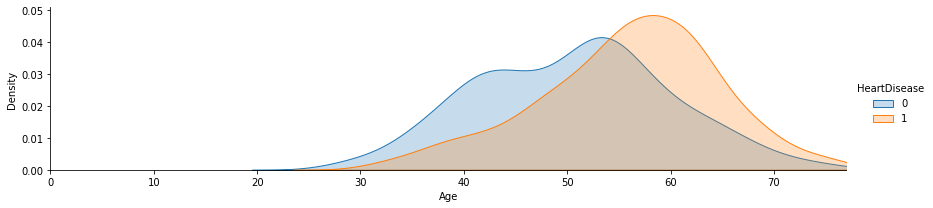

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()



Age에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

빨강색(발병)과 파랑색(정상)이 구분되어 있지 않고 혼재되어 나타나있음을 알 수 있다. 

데이터셋의 Age가   20대 이상이며 주로 40~60대 임을 알 수 있었다.

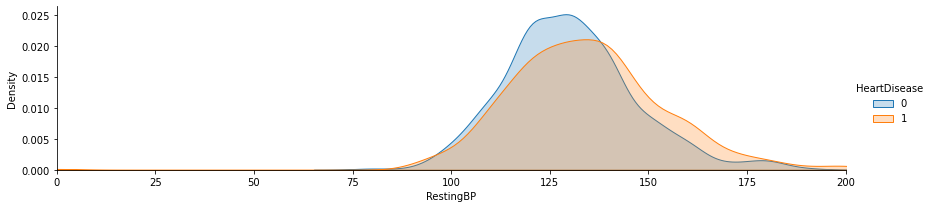

In [ ]:
facet2 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet2.map(sns.kdeplot, 'RestingBP', shade=True)
facet2.set(xlim=(0, df['RestingBP'].max()))
facet2.add_legend()

plt.show() 

RestingBP에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

빨강색(발병)과 파랑색(정상)이 구분되어 있지 않고 혼재되어 나타나있음을 알 수 있다. 

데이터셋의 RestingBP가 75 이상이며 주로 125~150 임을 알 수 있었다.

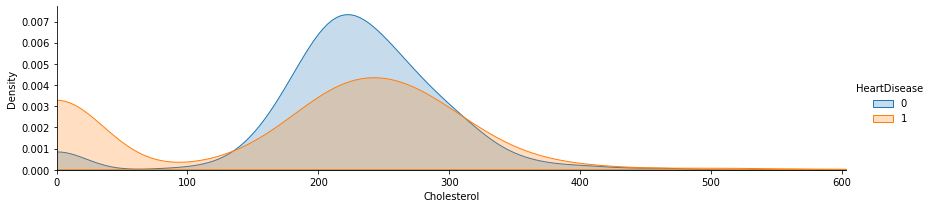

In [ ]:
facet3 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet3.map(sns.kdeplot, 'Cholesterol', shade=True)
facet3.set(xlim=(0, df['Cholesterol'].max()))
facet3.add_legend()

plt.show()

Cholesterol에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

Cholesterol의 수치가 100이하로 많이 낮을 경우, 300이상으로 높을경우 HeartDisease가 발병한 경우가 많았으며

데이터셋의 Cholesterol이 주로 200~300 임을 알 수 있었다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


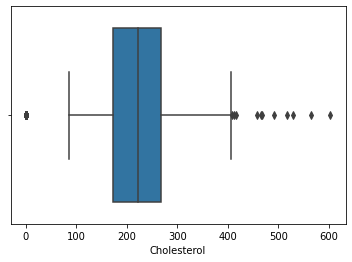

In [ ]:
sns.boxplot(df['Cholesterol'])

In [ ]:
df.loc[df['Cholesterol'] >= 400, 'Cholesterol'] = 400

Cholesterol이 일정 수준 이상부터는 그 데이터수가 확연하게 적기 때문에


400이상의 수치를 같은 값으로 동일하게 바꾼다 (이상치 제거의 과정)


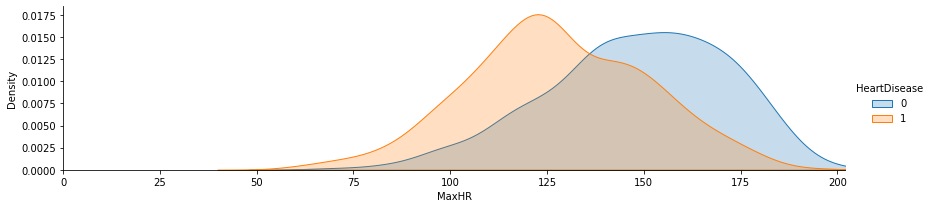

In [ ]:
facet4 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet4.map(sns.kdeplot, 'MaxHR', shade=True)
facet4.set(xlim=(0, df['MaxHR'].max()))
facet4.add_legend()


MaxHR에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

빨강색(발병)과 파랑색(정상)이 잘 구분되어 있지 않고 혼재되어 나타난다. 

데이터셋의 MaxHR이 50 이상이며 주로 125~150 임을 알 수 있었다.

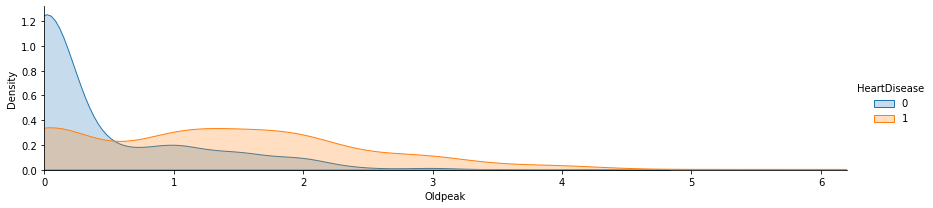

In [ ]:
facet5 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet5.map(sns.kdeplot, 'Oldpeak', shade=True)
facet5.set(xlim=(0, df['Oldpeak'].max()))
facet5.add_legend()

Oldpeak에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

Oldpeak가 낮을 때 정상인 경우(파랑색)가 발병할 경우보다 확연하게  많았다

Oldpeak가 2보다 커질경우 발병하는 경우는 거의 없었으며 대부분의 데이터의 Oldpeak가 4 이하였다 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


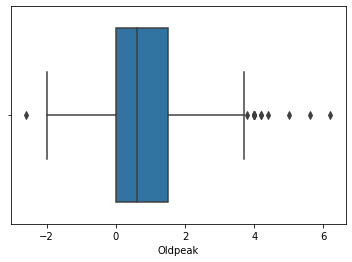

In [ ]:
sns.boxplot(df['Oldpeak'])

In [ ]:
df.loc[df['Oldpeak'] >= 4, 'Oldpeak'] = 4

Oldpeak의 경우  일정수준 이상부터는 그 데이터수가 확연히 적기 때문에 

4이상의 수치를 같은 값으로 동일하게 바꾼다 (이상치 제거의 과정)


5개의 Numerical 변수들 중 Plot을 통해 HeartDisease와 관계가 있을 것으로 예상되는 변수들은

'Cholesterol' 과 'Oldpeak'이다

'Age', 'RestingBP','MaxHR'의 경우 크기에 상관없이 HeartDisease의 발생수가 비슷하게 나타남으로 고려하지 않았다 

(결과가 궁금하여 따로 분석을 진행해보았지만 세 변수 모두 P-value가 0.05 이상으로로 유의미 하지 않았다)

In [ ]:
df['Cholesterol'].describe()

count    918.000000
mean     197.769063
std      106.854935
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      400.000000
Name: Cholesterol, dtype: float64

In [ ]:
df['Oldpeak'].describe()

count    918.000000
mean       0.881264
std        1.044076
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        4.000000
Name: Oldpeak, dtype: float64

-Categorical Data

In [ ]:
# 특정 feature에 따른 HeartDisease 비교 (0: 발병x, 1: 발병) 함수
def bar_chart(feature):
    survived = df[df['HeartDisease']==1][feature].value_counts()
    dead = df[df['HeartDisease']==0][feature].value_counts()
    df_survived = pd.DataFrame([survived,dead])
    df_survived.index = ['HeartDisease','Normal']
    df_survived.plot(kind='bar',stacked=True, figsize=(10,5))

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

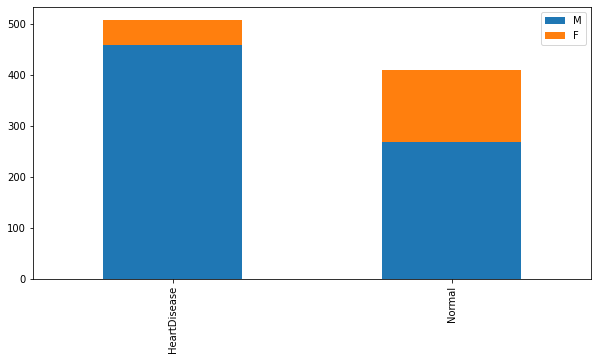

In [ ]:
bar_chart('Sex')
df.groupby(['Sex'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

실제 남성이 여성보다 데이터 수가 많았지만, Normal에서의 비율 차이보다 HeartDisease에서의 남성 비율이 높기 때문에

남성이 HeartDisease 발생이 여성보다 많다고 해석할 수 있다.

ChestPainType
ASY    0.790323
ATA    0.138728
NAP    0.354680
TA     0.434783
Name: HeartDisease, dtype: float64

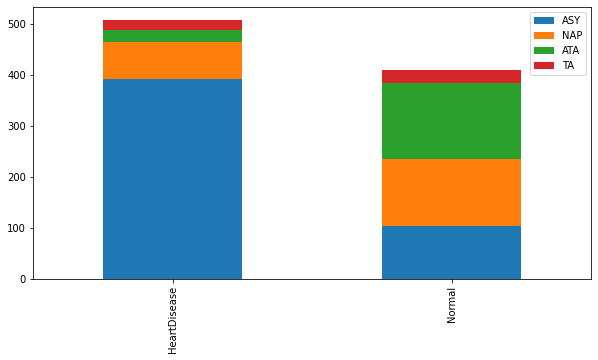

In [ ]:
bar_chart('ChestPainType')
df.groupby(['ChestPainType'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

ChestPainType의 경우 ASY일 때 HeartDisease의 발병비율이 매우 높은것 을 알 수 있었으며

ATA일때 HeartDisease의 발병비율이 매우 낮은 것을 알 수 있었다.

FastingBS
High    0.794393
Low     0.480114
Name: HeartDisease, dtype: float64

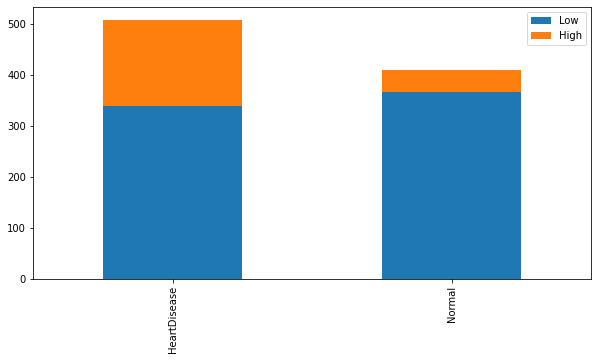

In [ ]:
bar_chart('FastingBS')
df.groupby(['FastingBS'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

FastingBS가 High일 경우 HeartDisease가 발병했을 때와 정상인 경우를 비교해봤을 때 

발병했을 때의 데이터가 훨씬 많았음을 알 수 있었다.

RestingECG
LVH       0.563830
Normal    0.516304
ST        0.657303
Name: HeartDisease, dtype: float64

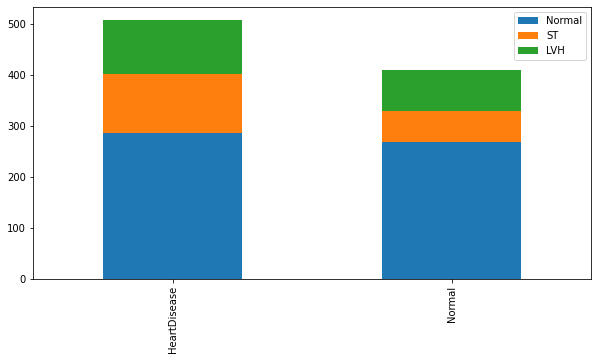

In [ ]:
bar_chart('RestingECG')
df.groupby(['RestingECG'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

RestingECG가  Normal,ST,LVH일때의 비율이 HeartDisease가 발병했을 때와 정상일 때 차이가 거의 없음을 알 수 있었다.

ExerciseAngina
N    0.351005
Y    0.851752
Name: HeartDisease, dtype: float64

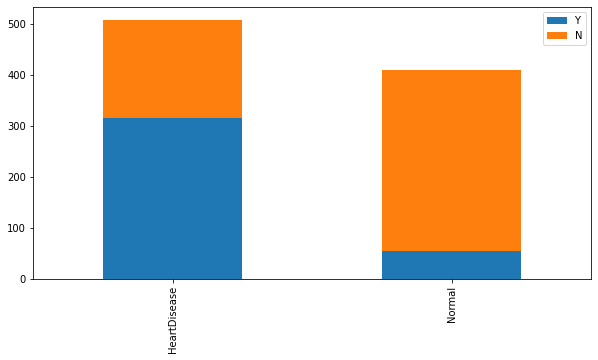

In [ ]:
bar_chart('ExerciseAngina')
df.groupby(['ExerciseAngina'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

ExerciseAngina의 경우 HeartDisease의 발병했을때와 정상일 때를 비교하면 

ExerciseAngina가 있을 경우 발병한 데이터가 훨씬 많음을 알 수 있었다.

ST_Slope
Down    0.777778
Flat    0.828261
Up      0.197468
Name: HeartDisease, dtype: float64

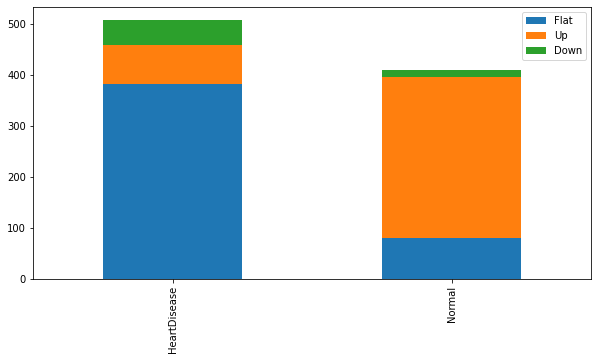

In [ ]:
bar_chart('ST_Slope')
df.groupby(['ST_Slope'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

ST_Slope의 경우 Flat한 경우 HeartDisease가 발병한 데이터가 많음을 알 수 있었으며 

Up인 경우 HeartDisease가 발병할 경우보다 정상인 경우가 많음을 알 수 있었고

Down인 경우 HeartDisease가 발병할 경우가 정상인 경우와 비교해봤을때 많은 것을 알 수 있었다.

*추가 EDA

Kaggle에 있는 코드를 참고하여 데이터분포 및 데이터간 Plot을 보다 이해하기 쉽게 확인해보았다.

In [ ]:
#Minors, young people, middle-aged people, middle-aged and old people, old people————Five levels
dfage = df.assign(box_age=pd.cut(df["Age"],
                         bins=[0,18,30,45,55,100])).loc[:,["box_age","HeartDisease"]].assign(count_pointer=1).groupby(["box_age","HeartDisease"]).agg(count_num=("count_pointer","count"))
dfage = dfage.reset_index()
dfage

,box_age,HeartDisease,count_num
0,"(0, 18]",0,0
1,"(0, 18]",1,0
2,"(18, 30]",0,5
3,"(18, 30]",1,0
4,"(30, 45]",0,130
5,"(30, 45]",1,61
6,"(45, 55]",0,156
7,"(45, 55]",1,160
8,"(55, 100]",0,119
9,"(55, 100]",1,287


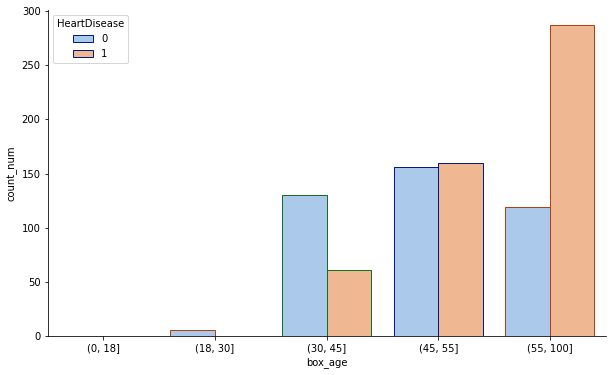

In [ ]:
plt.figure(figsize=(10,6))
fig =sns.barplot(x=dfage["box_age"],y=dfage["count_num"],hue=dfage["HeartDisease"],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

Age의 구간별 HeartDisease 발병유무 데이터수를 확인할 수 있었다.

Age는 대부분의 데이터가 30 이상이었으며 HeartDisease가 발병한 데이터의 대부분은 Age가 45 이상이었다



In [ ]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
dfchest = df.assign(chest=1).loc[:,["ChestPainType","HeartDisease","chest"]].groupby(["ChestPainType","HeartDisease"]).agg(count_num=("chest","sum")).reset_index()
dfchest

,ChestPainType,HeartDisease,count_num
0,ASY,0,104
1,ASY,1,392
2,ATA,0,149
3,ATA,1,24
4,NAP,0,131
5,NAP,1,72
6,TA,0,26
7,TA,1,20


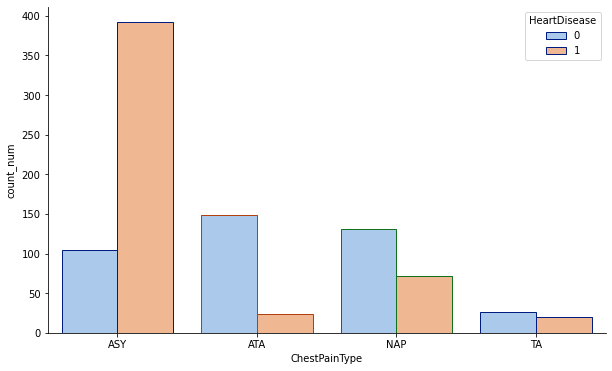

In [ ]:
plt.figure(figsize=(10,6))
fig =sns.barplot(x=dfchest["ChestPainType"],y=dfchest["count_num"],hue=dfchest["HeartDisease"],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

ChestPainType의 유형별 HeartDisease 발병유무 데이터수를 확인할 수 있었다.

ASY일 경우 HeartDisease가 발생할 확률이 훨씬 높았으며

ATA일 경우 HeartDisear가 발생할 확률이 훨씬 낮았다.

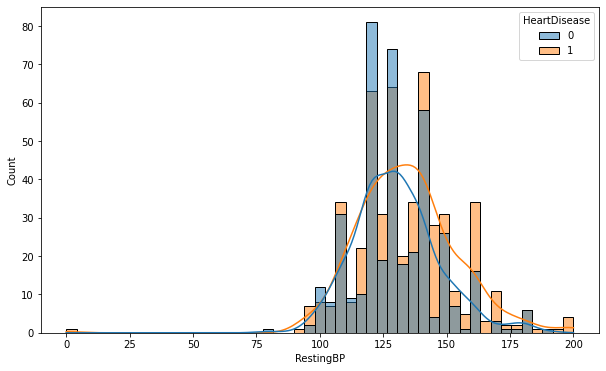

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="RestingBP",kde=True,hue="HeartDisease",color="r")
#회색 의미가 ??#

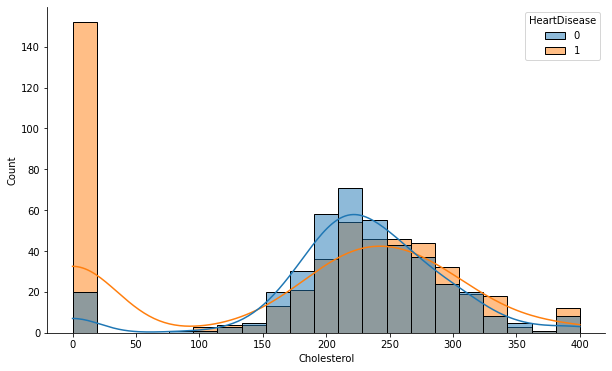

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="Cholesterol",kde=True,hue="HeartDisease")
sns.despine()

6개의 Categorical 변수들 중 Plot을 통해 HeartDisease와 관계가 있을 것으로 예상되는 변수들은

'Sex','ChestPainType','FastingBS','ExerciseAngina','ST_Slope'이다

RestingECG가의 경우 세 가지 유형모두 발병비율과 발병하지 않을 비율이 비슷하게 나타남으로 고려하지 않았다 

(결과가 궁금하여 따로 분석을 진행해보았지만 RestingECG의 경우 P-value가 0.05 이상으로로 유의미 하지 않았다)

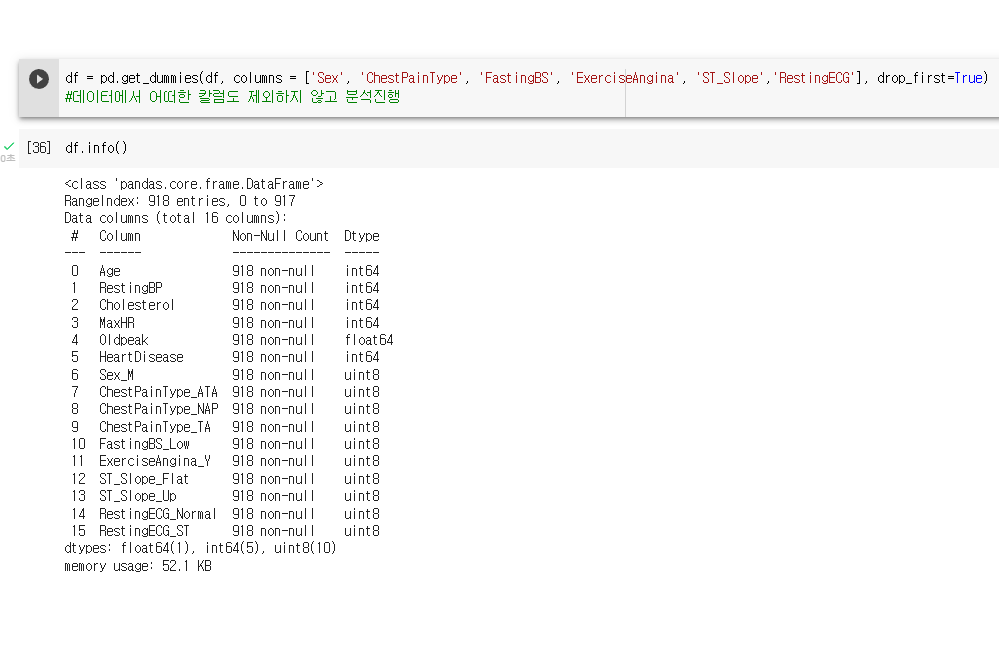

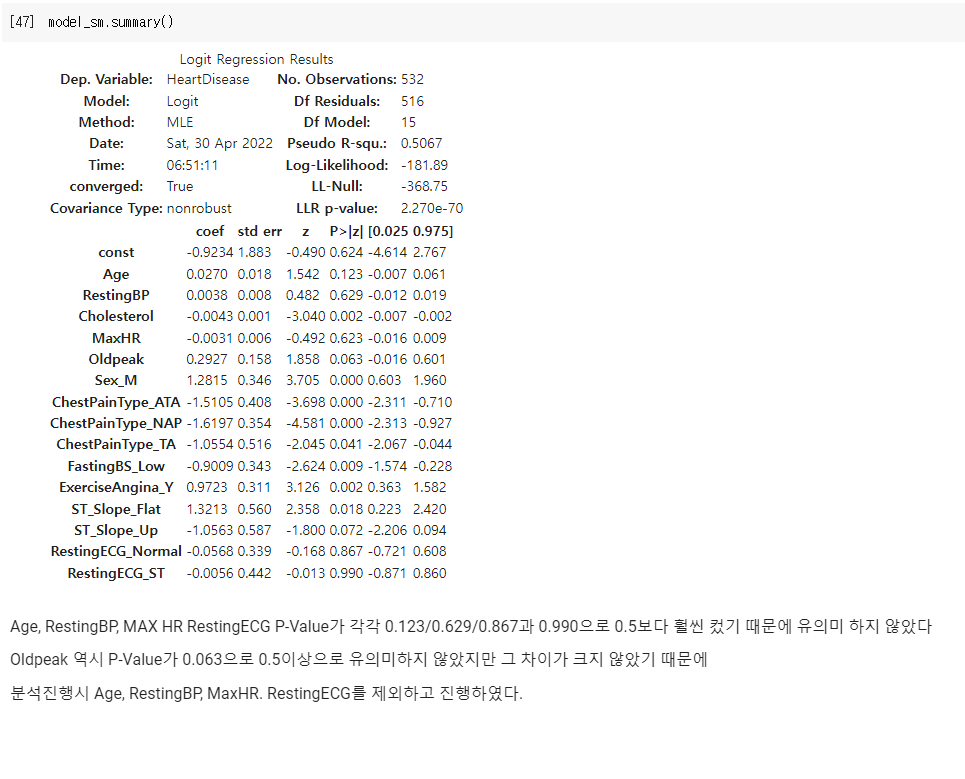

따라서 
'Cholesterol', 'Oldpeak', 'Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope' 의 7가지 column을 

유의미하다고 보고 분석을 진행한다.

In [ ]:
df=df[[ 'Cholesterol', 'Oldpeak', 'Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope','HeartDisease']]

In [ ]:
df

,Cholesterol,Oldpeak,Sex,ChestPainType,FastingBS,ExerciseAngina,ST_Slope,HeartDisease
0,289,0.0,M,ATA,Low,N,Up,0
1,180,1.0,F,NAP,Low,N,Flat,1
2,283,0.0,M,ATA,Low,N,Up,0
3,214,1.5,F,ASY,Low,Y,Flat,1
4,195,0.0,M,NAP,Low,N,Up,0
...,...,...,...,...,...,...,...,...
913,264,1.2,M,TA,Low,N,Flat,1
914,193,3.4,M,ASY,High,N,Flat,1
915,131,1.2,M,ASY,Low,Y,Flat,1
916,236,0.0,F,ATA,Low,N,Flat,1


In [ ]:
# Features와 target 나누기
t_features = df[df.columns[:-1]]
t_target = df[df.columns[-1]]

In [ ]:
# One-hot Encoding (decision tree는 비모수적 방법이므로, dummy변수를 하나 제거하는게 아니다! 살린다.)
t_features = pd.get_dummies(t_features, columns = ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
t_features

,Cholesterol,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_High,FastingBS_Low,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,289,0.0,0,1,0,1,0,0,0,1,1,0,0,0,1
1,180,1.0,1,0,0,0,1,0,0,1,1,0,0,1,0
2,283,0.0,0,1,0,1,0,0,0,1,1,0,0,0,1
3,214,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,195,0.0,0,1,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,264,1.2,0,1,0,0,0,1,0,1,1,0,0,1,0
914,193,3.4,0,1,1,0,0,0,1,0,1,0,0,1,0
915,131,1.2,0,1,1,0,0,0,0,1,0,1,0,1,0
916,236,0.0,1,0,0,1,0,0,0,1,1,0,0,1,0


In [ ]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 2021, stratify=t_target)

In [ ]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

734
734
184
184


In [ ]:
import pandas as pd
pd.DataFrame(train_target)['HeartDisease'].value_counts() # Y열의 데이터 개수 확인

1    406
0    328
Name: HeartDisease, dtype: int64

불균형이 조금 있기때문에 언더샘플링을 진행해준다. 

In [ ]:
# Under Sampling: Y값을 각각 {0, 1} 328명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=312)
y_shuffled = sklearn.utils.shuffle(train_target, random_state=312)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=312).fit_resample(x_shuffled, y_shuffled)

In [ ]:
import pandas as pd
pd.DataFrame(train_target_us)['HeartDisease'].value_counts() # Y열의 데이터 개수 확인: total 656명

0    328
1    328
Name: HeartDisease, dtype: int64

## Decision Tree Modeling

- entropy (uncertainty)
  - $E=-\sum^k_{i=1}p_ilog_2(p_i)$
- gini index: 엔트로피와 같은 불순도 (Impurity) 지표
  - 경제적 불평등을 계수화
  - 분류가 잘 될 때 낮은 값
  - CART 알고리즘에서는 모든 조합에 대해 Gini index를 계산한 후, Gini index가 가장 낮은 지표를 찾아 분기
  - $Gini(t,D)=1-\sum_{l \in levels(t)}P(t=l)^2$
- Information gain
  - impurity의 개선 정도
    - decision tree에 의해 나누기 전의 impurity - 나누어진 subset들의 impurity
- pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
'''
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
tree = DecisionTreeClassifier(random_state = 312)
# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
tree_fit = tree.fit(train_features_us, train_target_us)

In [ ]:
tree_fit

DecisionTreeClassifier(random_state=312)

In [ ]:
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import os

In [ ]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['HeartDisease', 'Normal'])

Target을 Heart Disease 와 Normal 로 나누었다. 

In [ ]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Tree 이미지를 저장

True

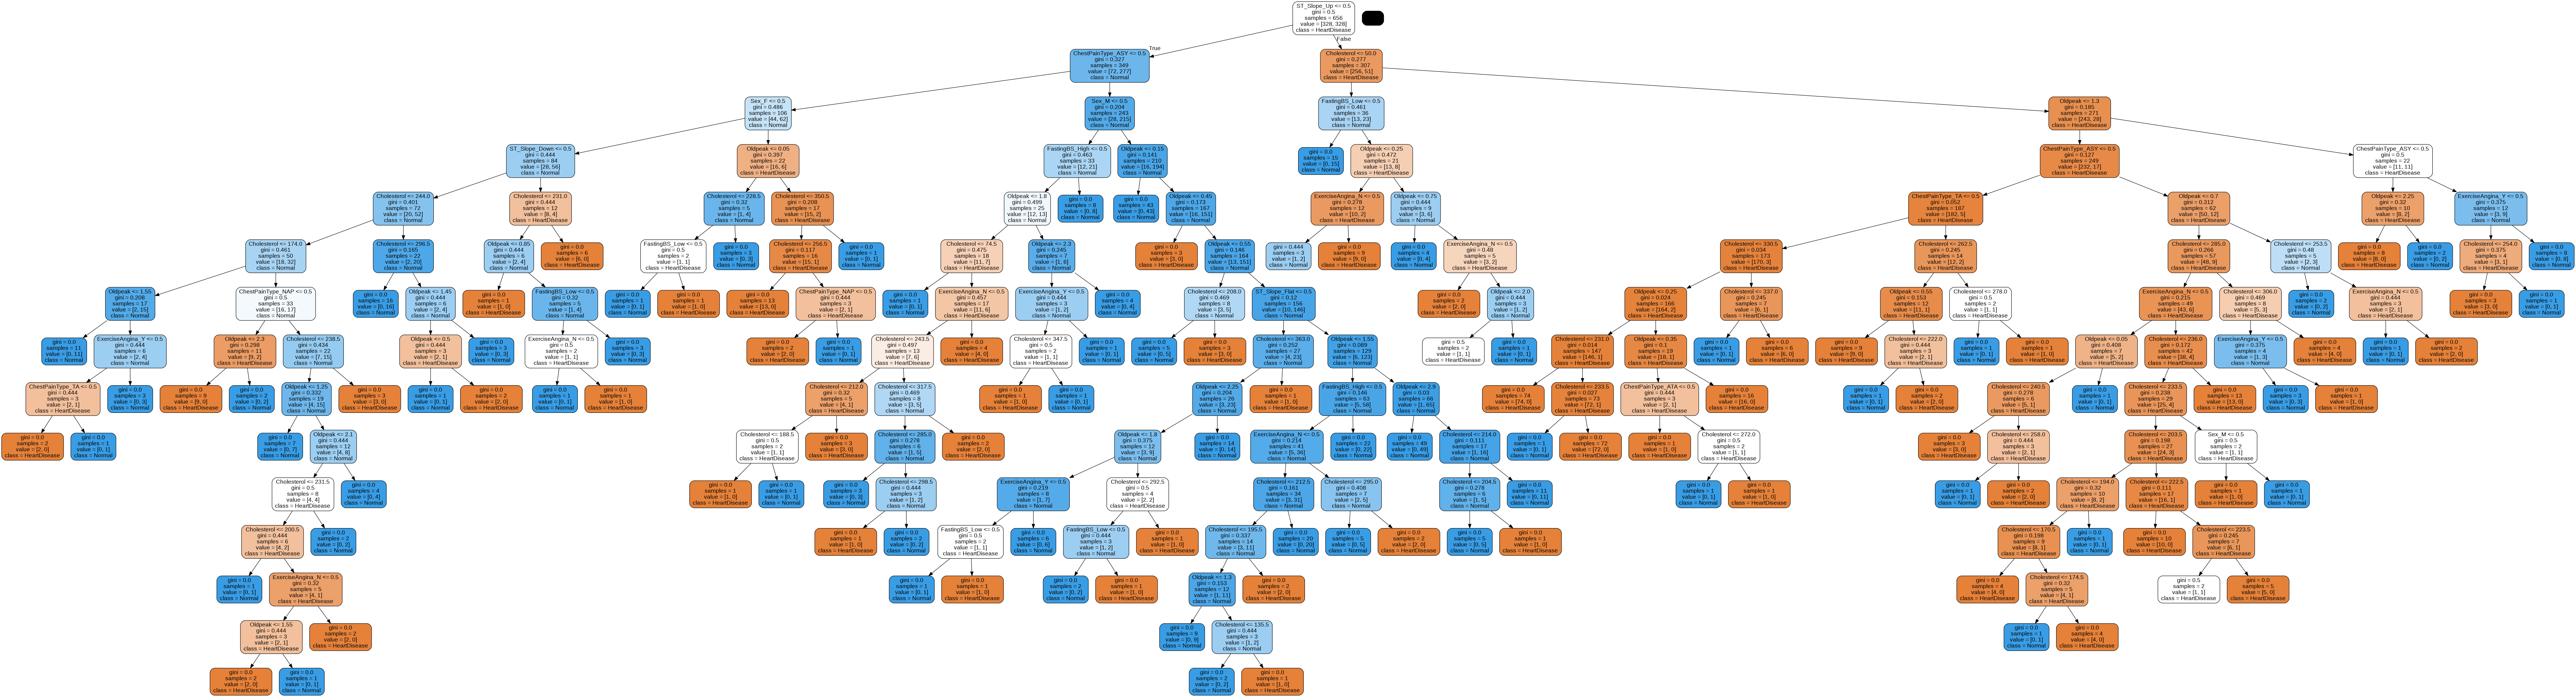

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

의사결정나무가 충분히 분류를 잘해주고 있음에도 규칙 생성 로직을 미리 제어하지 않아 완벽한 클래스 값을 구별해내기 위해 트리노드를 계속해서 만들어 나간다. 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합 되는 문제점을 갖게 된다. 따라서 과적합이 상당히 높다는 의사결정나무의 특징을 보여준다. 따라서 하이퍼 파라미터를 통해 의사결정나무 알고리즘을 제어하여 복잡한 트리가 생성되는 것을 막아주어야 한다. 아래 Optimization, Grid Search 참고.

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_accuracy']),
                                     np.std(scores['test_accuracy'])))

CV accuracy: [0.89393939 0.86363636 0.81818182 0.77272727 0.8030303  0.86363636
 0.87692308 0.73846154 0.78461538 0.83076923]
CV aacuracy(Mean): 0.825 (std: 0.048)


In [ ]:
y_pred = tree.predict(test_features)

In [ ]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

,Predict[0],Predict[1]
True[0],64,18
True[1],20,82


 Confusion Matrix에서 TP(True Positive)와 TN(True Negative)가 높을수록 좋은 성능을 보여준다. 


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        82
           1       0.82      0.80      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.793
정밀도 precision: 0.820
재현율 recall: 0.804
F1-score: 0.812
AUC: 0.792


- Accuracy: TP+TN/TP+FP+TN+FN , 전체 경우의 수 중에서 정답으로 분류한 비율
- Precision: TP/TP+FP , 내가 예측한 값 중에서 정답이 있을 경우를 나타냄
- Recall: TP/TP+FN , 실제 1인 값 중에서 1이라고 예측한 것이 있을 경우를 나타냄
- F1 score: Precision 과 Recall은 일종의 trade-off 관계를 가지므로 둘의 밸런스를 고려하여 정확도를 측정함

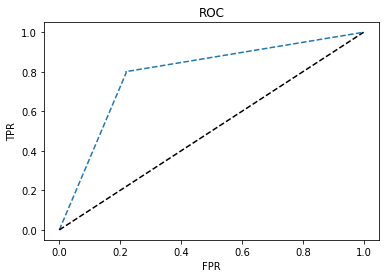

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

> ROC Curve

ROC curve 에는 두가지 매개 변수가 있다. 
- True Positive Rate(TPR): TP/TP+FN, 실제 감도를 나타냄
- False Positive Rate(FPR): FP/FP+TN, 거짓 감도를 나타냄

두 매개 변수 모두 작동 특성으로 알려져 있으며 ROC 곡선을 정의하는 요소로 사용된다. 

Python에서 모델의 효율성은 곡선 아래 영역 (AUC)을보고 결정된다. 따라서 가장 효율적인 모델의 AUC는 1이고 가장 비효율적인 모델의 AUC는 0.5이다.

본 분류에서 AUC는 0.792가 나왔으므로 1에 더 가까우므로 분류가 잘 되었다고 볼 수 있다. 

https://angeloyeo.github.io/2020/08/05/ROC.html

## Optimization

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=312)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [ ]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

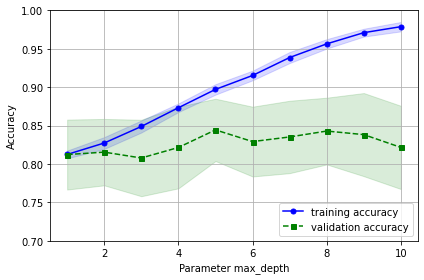

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features_us,
                                                   y = train_target_us,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="accuracy",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()



> Validation Curve

- Validation_curve 함수는 최적화할 파라미터 이름과 범위, 그리고 성능 기준을 param_name, param_range, scoring 인수로 받아 파라미터 범위의 모든 경우에 대해 성능 기준을 계산한다.
- max_depth 가 낮을수록 모델이 과소적합되고, max_depth 가 높을수록 모델이 과적합이 된다. 
- 따라서 여기서는 train accuracy와 validation accuracy가 모두 적절한 성능 & 오버피팅이 발생하기 전까지인 max_dept = 5 선택하였다.




## Grid Search

GridSearch 를 이용하면 최고 성능을 가지는 parameter 조합을 찾을 수 있다. 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리; -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_)
print(gs.best_params_)

0.8444055944055945
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_leaf': 10}


scoring = 'accuracy'를 기준으로 GridSearch를 진행했다. 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'f1', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리; -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_)
print(gs.best_params_)

0.8433002696195938
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_leaf': 10}


scoring = 'f1'를 기준으로 GridSearch를 진행했다.

accuracy와 f1을 기준으로 했을때 같은 결과가 나왔다. 

In [ ]:
# 최적의 모델 선택
best_tree = gs.best_estimator_
best_tree.fit(train_features_us, train_target_us)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=10,
                                        random_state=312))])

최적의 모델은 max_depth =8 일때, min_samples_leaf = 10 일때 임을 알 수 있다. 

In [ ]:
best_tree_for_graph = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, random_state = 2021)

In [ ]:
best_tree_for_graph.fit(train_features_us, train_target_us)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=2021)

In [ ]:
y_pred = best_tree.predict(test_features)

In [ ]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],68,14
True[1],21,81


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        82
           1       0.85      0.79      0.82       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.810
정밀도 precision: 0.853
재현율 recall: 0.794
F1-score: 0.822
AUC: 0.812


- Best Parameter 적용 전 -> 후

정확도 accuracy: 0.793 -> 0.810

정밀도 precision: 0.820 -> 0.853

재현율 recall: 0.804 -> 0.794

F1-score: 0.812 -> 0.822

AUC: 0.792 -> 0.812

GridSearch 를 통해 best parameter를 적용시, 재현율을 제외한 나머지 지표들이 상승한 것을 볼 수 있다. 



세 성능 지표중 가장 중요한 것은 Accuray이다. 심장 질환과 같은 가볍지 않은 질병의 경우 정상일 때 발병이라고 판단하거나 ,발병햇을때 정상이라고 판단하는 것 모두 치명적이다. 전자의 경우 환자에게 큰 스트레스 및 병원비가 사용될 수 있고, 후자의 경우는 질환의 조기치료를 놓치고 건강악화의 위험이 발생할 수 있기 때문이다.

Accuracy는 약 81퍼센트이다. 이는 Decision Tree을 이용하여 HeartDisease의 발병을 추정했을때 총 184건의 추정중 149건을 정확히 추정하였기 때문에 Decision Tree의 정확도가 127/147= 약 86퍼센트 인것이다. 질병을 판단하는 모델의 경우 그 정확도가 90퍼센트이상은 되어야 적합하다고 생각된다. 따라서 81퍼센트의 정확도를 가지는 이 선형모델은 일반적으로는 정확도가 높다고 생각할 수 있지만 실제로 사용하기에는 조금 부족하다고 해석된다.

두 번째로 중요한 지표는 Recall이다. 질병의 경우 실제 환자가 발병했을 때 그 병을 정확히 진단해야 하며 만약 그 병을 정상이라 진단할 경우 조기치료가 중요한 심장 질환의 경우 그 판단이 치명적일 수 있기 때문이다.

Recall은 약 79퍼센트이다. 이는 Decision Tree을 이용하여 HeartDisease가 실제로 발생한 경우 중 실제로 model이 발병했다고 추정한 비율이다. 총 102건의 실제 발병한 경우 중 81건을 정확히 추정하였기 때문에 Decision Tree의 재현도가 81/102= 약 79퍼센트 인것이다. Recall의 경우도 Accuracy와 같이 일반적으로는 높다고 판단되나, 질병의 판단에 사용되기 때문에 조금 부족하다고 해석된다.

세 번째로 중요한 지표는 Precision이다. 질병의 경우 모델이 발병했다고 판단했을 때 실제로 발병해야 할 확률 역시 중요하다.물론 실제로 발병하지 않았을 경우 환자가 정상이라는 것이기 때문에 Recall 보다는 중요하진 않지만, 환자의 스트레스 및 추가로 사용될 수 있는 병원비들을 고려할때, Precision 역시 중요하다.

Precision은 약 85퍼센트이다. 이는 Decision Tree을 이용하여 모델이 HeartDisease가 발생했다고 추정한 경우 중 실제로 발병한 비율이다. 총 95건의 발병했다고 추정한 경우 중 81건이 실제로 발병하였기 때문에 Decision Tree의 정밀도가 81/95= 약 85퍼센트 인것이다. Precision의 경우도 Accuracy와 같이 일반적으로는 높다고 판단되나, 질병의 판단에 사용되기 때문에 조금 부족하다고 해석된다.

Decision Tree로 80%보다 높은 성능 지표를 갖었음에도 심장병은 잘못 예측하면 생명을 잃을 수도 있기에 해당 모델을 심장병 예측에 사용하는 것은 무리가 있다. 따라서 더 성능이 좋은 모델을 활용하거나 보조적인 지표 정도로만 사용하는 것이 좋다. 

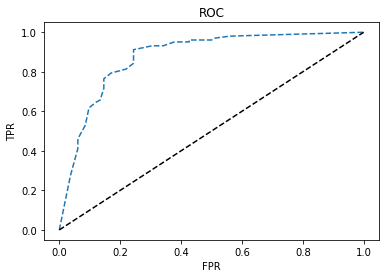

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

앞서 최적의 파라미터를 설정하지 않고 진행했을때에 비해 ROC 커브가 좌상단으로 더 붙어있으므로 더 좋은 분류기를 형성했다고 할 수 있다. 

In [ ]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Normal', 'HeartDisease'])

In [ ]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best.png') #Tree 이미지를 저장

True

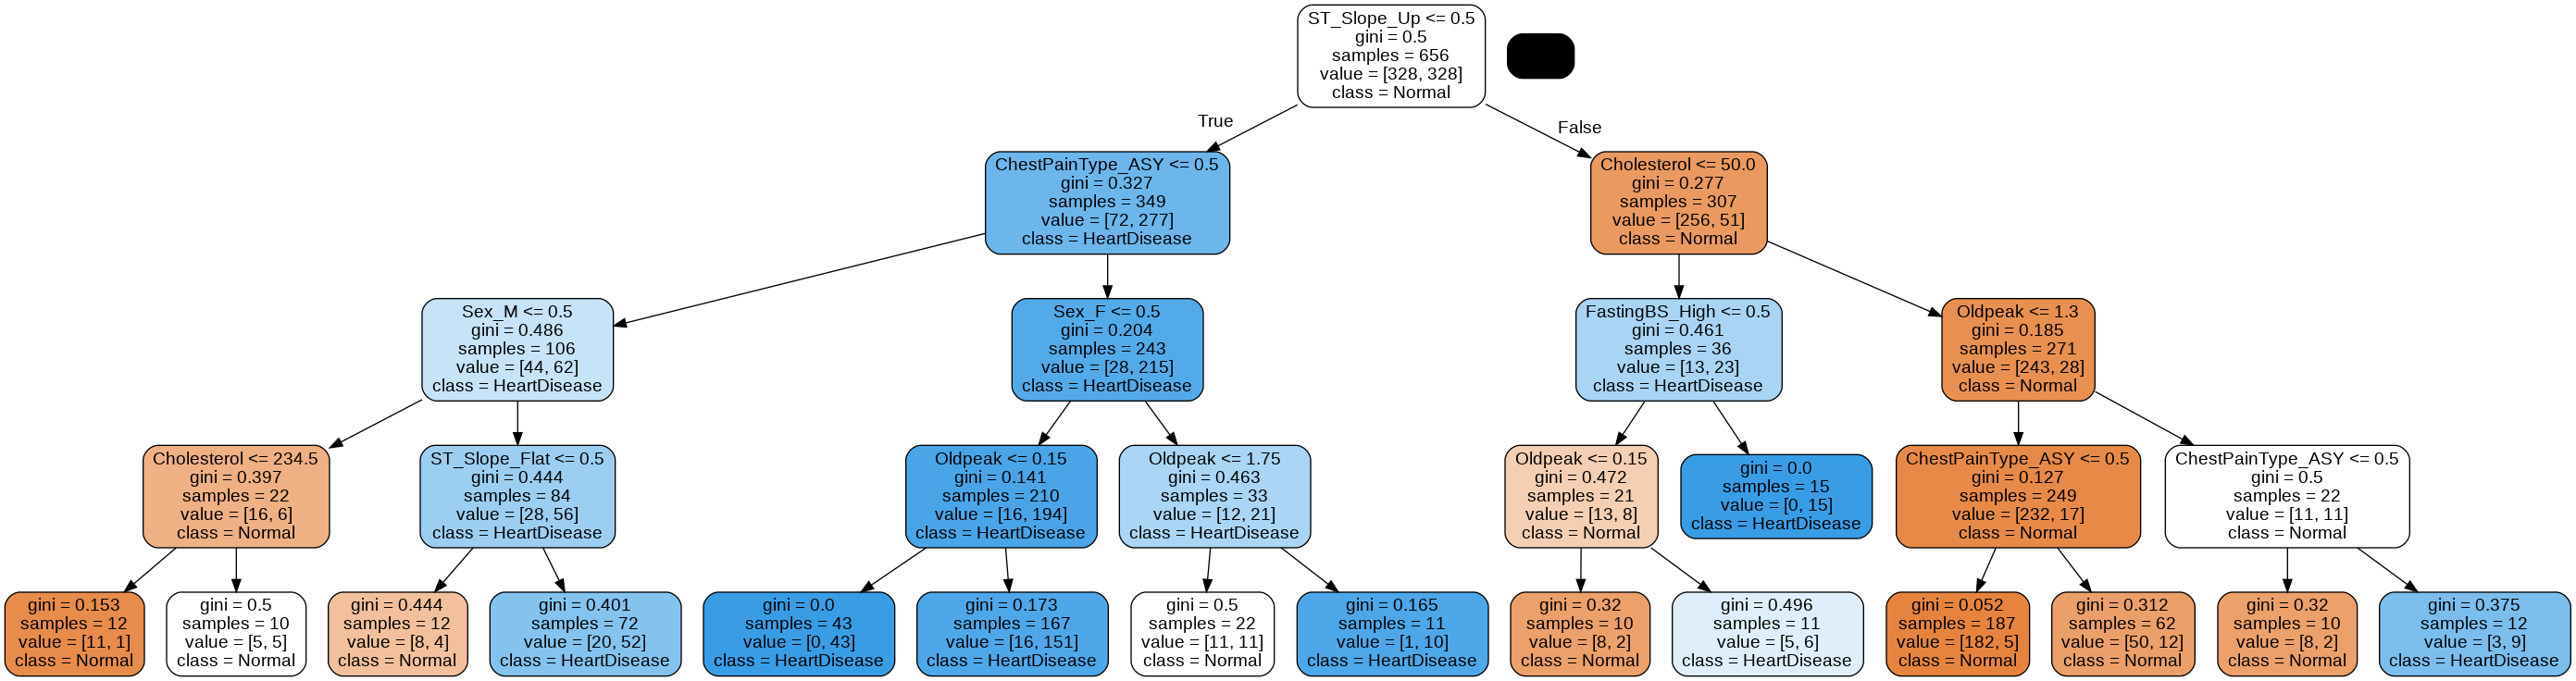

In [ ]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

우선 Slope Up, 콜레스테롤, ChestPainType_ASY, OldPeak, FastingBS_High순으로 의사결정나무가 쪼개지는 것을 확인할 수 있다. 이는 아래의 Feature Importance에서 확인해 볼 수 있으며 실제로 ST_Slope_Up, Cholesterol, ChestPainType_ASY, OldPeak, FastingBS_High 순으로 Feature Importance가 큰것으로 나타났다. 

우선 첫번째 노드인 ST_SLope_Up을 살펴보면 샘플이 총 656개로 각각 심장병 있는 사람 328명과 정상인 사람 328명이다. 머신러닝에서 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니계수가 낮은 속성을 기준으로 분할한다. 해당노드는 정확하게 328명으로 반반임으로 지니계수는 0.5이다. ST_Slope_Up<
=0.5 True, False라는 규칙으로 분기하면 두번째 세번째 노드가 만들어진다. 

두번째 노드는 총샘플 349개이며 72정상과, 277의 심장병으로 분기되어 지니계수가 0.327을 가진다. 이는 여러가지 분기 가능한 변수들 중 지니계수가 가장 낮은 ChestPain_Type <=0.5로 분기하게 된 것이다. 

한가지 경우를 들어 해당 의사결정 나무를 분석해보자면 Slope_Up이 0.5 이하인경우 심장병일 활률이 더 높고 높을경우 정상일 확률이 높다. 하지만 이를 더 구체적으로 가르면 ASY이하이며 콜레스테롤이 234.5 이하일 경우는 정상이며 Slope_Flat이 0.5 이상이면 심장병으로 나뉘어 진다. 반면 ChestPain이 ASY0.5보다 클경우에는 다른 변수와 상관없이 심장병인 것으로 나타났다. Slope_Up <=0.5 이하이지만 ChestPainType ASY이 0.5 이상인경우에는 심장병으로 분류한다. 이는 직관적으로 ST_Slope이 UPsloping 이 아니고 Asymtomatic인경우 심장병으로 분류한다는 것이다. 

- [feature_importance](https://soohee410.github.io/iml_tree_importance): 불순도를 가장 크게 감소시키는 변수의 중요도가 가장 큼
  - 연속형 변수 또는 카테고리 개수가 매우 많은 변수들(high cardinality)의 중요도를 더욱 부풀릴 가능성이 높음
  - train 과정에서 얻은 중요도이기 때문에, test 데이터셋에서는 이 변수 중요도가 어떻게 변하는 지 알 수 없음 
  - 어떤 변수가 어떤 방향으로(positive or negative)로 영향일 미치는지 판단을 할 수 없음 -> [shap value](https://todayisbetterthanyesterday.tistory.com/56)

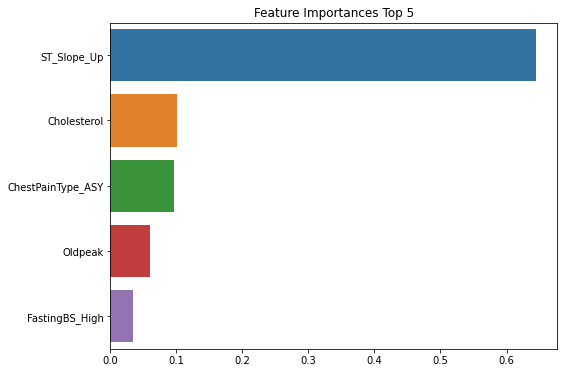

In [ ]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

Decision Tree를 이용하여 분류할때 ST_Slope_Up, Cholesterol, ChestPainType_ASY, OldPeak, FastingBS_High 순서대로 중요한 변수임을 알 수 있다. 

In [ ]:
feature_importances.sort_values(ascending=False)

ST_Slope_Up          0.644066
Cholesterol          0.100747
ChestPainType_ASY    0.095942
Oldpeak              0.059413
FastingBS_High       0.033574
Sex_M                0.027089
Sex_F                0.023593
ST_Slope_Flat        0.015575
ChestPainType_ATA    0.000000
ChestPainType_NAP    0.000000
ChestPainType_TA     0.000000
FastingBS_Low        0.000000
ExerciseAngina_N     0.000000
ExerciseAngina_Y     0.000000
ST_Slope_Down        0.000000
dtype: float64


Feature importance는 ST_Slope_UP가 0.644로 나눠지는 기준 중 가장 중요한 기준이다.그다음으로는 콜레스테롤, 심장페인종류인 ASY, Oldpeak, FastingsBS_HIgh, 성별순이다. 실제로 제일 먼저 나눠지는 순서가 ST_Slope_up 유무이며 ST_Slope_up <= 0.5가 False 일 경우에는 그 다음 항목이 콜레스테롤, True일 경우에는 ChestPainType_ASY인것을 확인할 수 있다. 또한 콜레스테롤<=50 이 True일경우 Fasting_BS, False일경우 OldPeak 임을 확인할 수 있다. Slope_Up<=0.5 True이고 Chest_Pain이 ASY<=0.5로 분류한뒤 True,False 모두 성별로 확인하는 것을 볼 수 있다. 

https://soohee410.github.io/iml_permutation_importance
하지만 연속형 변수 또는 카테고리 개수가 많은 변수들이 중요도를 부풀릴 가능성이 높기때문에, 특정 feature를 쓰지 않았을때 성능 손실에 얼마만큼의 영향을 주는자 확인하여 그 변수의 중요도를 파악하는 추가적인 연구를 고려해볼 필요가 있다. 


## Appendix: 트리 알고리즘: ID3, C4.5, C5.0 및 CART

다양한 의사 결정 트리 알고리즘은 모두 무엇이며 서로 어떻게 다릅니까? scikit-learn에서 구현된 것은 무엇입니까?

ID3 (반복적 이분법 3)은 1986년 Ross Quinlan에 의해 개발되었습니다. 알고리즘은 다방향 트리를 생성하여 각 노드에 대해(즉, 욕심 많은 방식으로) 범주형 대상에 대해 가장 큰 정보 이득을 얻을 범주형 기능을 찾습니다. 나무가 최대 크기로 자란 다음 일반적으로 나무가 보이지 않는 데이터로 일반화하는 능력을 향상시키기 위해 가지치기 단계가 적용됩니다.

C4.5는 ID3의 후속 제품이며 연속 속성 값을 개별 간격 세트로 분할하는 이산 속성(숫자 변수 기반)을 동적으로 정의하여 기능이 범주형이어야 한다는 제한을 제거했습니다. C4.5는 훈련된 트리(즉, ID3 알고리즘의 출력)를 if-then 규칙 세트로 변환합니다. 그런 다음 각 규칙의 이러한 정확성을 평가하여 적용해야 하는 순서를 결정합니다. 규칙 없이 규칙의 정확도가 향상되는 경우 규칙의 전제 조건을 제거하여 정리가 수행됩니다.

C5.0은 독점 라이선스에 따른 Quinlan의 최신 버전 릴리스입니다. 더 적은 메모리를 사용하고 C4.5보다 더 작은 규칙 세트를 구축하면서 더 정확합니다.

CART (분류 및 회귀 트리)는 C4.5와 매우 유사하지만 수치 대상 변수(회귀)를 지원하고 규칙 세트를 계산하지 않는다는 점에서 다릅니다. CART는 각 노드에서 가장 큰 정보 이득을 산출하는 기능과 임계값을 사용하여 이진 트리를 구성합니다.

scikit-learn은 최적화된 버전의 CART 알고리즘을 사용합니다. 그러나 scikit-learn 구현은 현재 범주형 변수를 지원하지 않습니다.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart